<h1 align=center><font size = 5>MobileViT</h1 >

<h3>Objective for this Notebook</h3>
<h5> 1. 觀看架構圖，試著撰寫出模型</h5>
<hr>

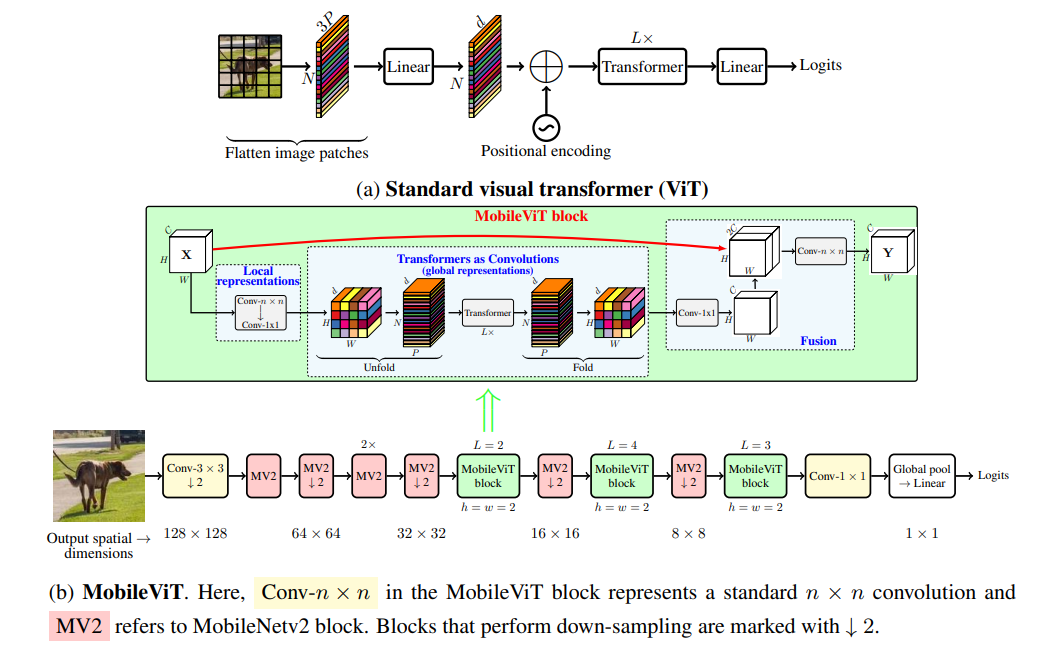

In [6]:
import torch
import torch.nn as nn

In [7]:
class InvertedResidual(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, expand_ratio=2):
        super().__init__()
        mid_channels = in_channels * expand_ratio
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, 1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, mid_channels, 3, stride, padding=1, groups=mid_channels, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        self.use_residual = (in_channels == out_channels and stride == 1)

    def forward(self, x):
        out = self.block(x)
        if self.use_residual:
            return x + out
        return out

class MobileViTBlock(nn.Module):
    def __init__(self, in_channels, transformer_dim, patch_size=2, num_heads=2):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, 3, padding=1)
        self.project_in = nn.Conv2d(in_channels, transformer_dim, 1)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=transformer_dim,
            nhead=num_heads,
            dim_feedforward=transformer_dim * 2,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)

        self.project_out = nn.Conv2d(transformer_dim, in_channels, 1)
        self.fuse = nn.Conv2d(in_channels * 2, in_channels, 1)
        self.patch_size = patch_size

    def forward(self, x):










        return # 回到 (B, C, H, W)


class MobileViT(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.stem = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        self.block1 = InvertedResidual(16, 32, stride=1)
        self.block2 = MobileViTBlock(32, transformer_dim=64)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.pool(x).flatten(1)
        x = self.fc(x)
        return x


# 雙擊展開正確答案

<!--
class InvertedResidual(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, expand_ratio=2):
        super().__init__()
        mid_channels = in_channels * expand_ratio
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, 1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, mid_channels, 3, stride, padding=1, groups=mid_channels, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        self.use_residual = (in_channels == out_channels and stride == 1)

    def forward(self, x):
        out = self.block(x)
        if self.use_residual:
            return x + out
        return out

class MobileViTBlock(nn.Module):
    def __init__(self, in_channels, transformer_dim, patch_size=2, num_heads=2):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, 3, padding=1)
        self.project_in = nn.Conv2d(in_channels, transformer_dim, 1)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=transformer_dim,
            nhead=num_heads,
            dim_feedforward=transformer_dim * 2,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)

        self.project_out = nn.Conv2d(transformer_dim, in_channels, 1)
        self.fuse = nn.Conv2d(in_channels * 2, in_channels, 1)
        self.patch_size = patch_size

    def forward(self, x):
        local_feat = self.conv1(x)  # shape: (B, C, H, W)
        x_proj = self.project_in(local_feat)  # (B, T_dim, H, W)

        B, C, H, W = x_proj.shape
        x_flat = x_proj.flatten(2).transpose(1, 2)  # (B, HW, T_dim)
        x_enc = self.transformer(x_flat)  # (B, HW, T_dim)
        x_enc = x_enc.transpose(1, 2).view(B, C, H, W)  # (B, T_dim, H, W)

        x_enc = self.project_out(x_enc)  # (B, C, H, W)

        x_fused = torch.cat([local_feat, x_enc], dim=1)  # (B, 2*C, H, W)
        return self.fuse(x_fused)  # 回到 (B, C, H, W)


class MobileViT(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.stem = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        self.block1 = InvertedResidual(16, 32, stride=1)
        self.block2 = MobileViTBlock(32, transformer_dim=64)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.pool(x).flatten(1)
        x = self.fc(x)
        return x


-->